### About Project {-}
In this project, we aim to build a time series model to analyse time series data on sunspots. Sunspots are the darker spots that form on photosphere of the sun. These spots usually form on the regions where surface temperature is reduced due to high concentration of magnetic field flux that impede convection.<br><br>
Sunspots are perceived with solar telescopes. These telescopes are equipped with spectroscopes and spectrohelioscopes that are used to examine sunspots and sunspot affected areas. Studying sunspots enable us to predict ___space weather___, ___global warming___ and ___conditions of ionosphere___.

#### Team {-}
- Purusharth Saxena - 1640207
- Sharanya Achut - 1640237
- Mohd. Saifuddin - 1640272

### Objectives {-}
* To understand the insights of time series.
* To gain working knowledge of time series analysis.
* Experimentation with time series data and fit the model.
* Generate `ARIMA` Model.
* Forecasts for validation dataset.

### Dataset {-}
Dataset sources are SILSO (Sunspot Index and Long-term Solar Observations) and Kaggle website.

### Tools {-}
- `Python`
    - `statsmodel` (Statistical library)
    - `pandas` (Dataframe library)
    - `numPy` (Numerical computation library)
    - `matplotlib` (Plotting library)
    - `scikit-learn` (Machine Learning library)
    - `datetime` (Date and Time library)

### Procedure {-}
We implement __Exploratory Data Analysis__ (EDA) approach. With this approach we explore the timeseries data, transform it to the form which is favourable for analysis. We also split data as __`training`__ set and __`validation`__ set for __`testing`__ and __`forecasting`__. EDA involves ___dataset forming___, ___data cleaning___ and ___data visualization___ etc.

#### Step-by-step guide {-}
- Invoke all necessary libraries and modules
- Formation of dataset
- Split data into training and validation set
- Fit the model
- Forecast or predict for validation set
- Calculate `Root Mean Squared Error`
- Interpretation of results
- Conclusion

### Libraries {-}

In [1]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing
from matplotlib.pylab import rcParams
from matplotlib import style
from matplotlib import pyplot as plt
from sklearn import metrics
import pandas as pd
import numpy as np
import datetime as dt
import math
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.2f}'.format

style.use('fivethirtyeight')

### Converting data into timeseries data {-}

In [2]:
sunspot_df = pd.read_csv('Sunspots.csv', index_col=0)
display(sunspot_df.head())

,date,monthly_mean
0,1749-01-31,96.70
1,1749-02-28,104.30
2,1749-03-31,116.70
3,1749-04-30,92.80
4,1749-05-31,141.70


We see that data is not indexed by __`date`__ column but is indexed automatically by __`pandas`__ numbering system. To exercise timeseries analysis, it is mandatory to index data by __`date`__ column.

In [3]:
sunspot_df['timestamp'] = pd.to_datetime(sunspot_df['date'])
display(sunspot_df.head())

sunspot_df.index = sunspot_df['timestamp']
display(sunspot_df.head())

,date,monthly_mean,timestamp
0,1749-01-31,96.70,1749-01-31
1,1749-02-28,104.30,1749-02-28
2,1749-03-31,116.70,1749-03-31
3,1749-04-30,92.80,1749-04-30
4,1749-05-31,141.70,1749-05-31


,date,monthly_mean,timestamp
timestamp,,,
1749-01-31,1749-01-31,96.70,1749-01-31
1749-02-28,1749-02-28,104.30,1749-02-28
1749-03-31,1749-03-31,116.70,1749-03-31
1749-04-30,1749-04-30,92.80,1749-04-30
1749-05-31,1749-05-31,141.70,1749-05-31


### Setting up {-}
In this step, we delete __`date`__ and __`timestamp`__ column as we already indexed our data by __`timestamp`__ column. Finally we display, __`head`__ and __`tail`__ of the data. It is always appreciated when we work on the __`copy`__ of the data. So we copy it new dataframe variable __`play_df`__. All the analysis is made on __`play_df`__ dataframe.

In [4]:
play_df = sunspot_df.copy()
play_df = play_df.drop(['date', 'timestamp'], axis=1)
display(play_df.head())
display(play_df.tail())

,monthly_mean
timestamp,
1749-01-31,96.70
1749-02-28,104.30
1749-03-31,116.70
1749-04-30,92.80
1749-05-31,141.70


,monthly_mean
timestamp,
2018-03-31,2.50
2018-04-30,8.90
2018-05-31,13.20
2018-06-30,15.90
2018-07-31,1.60


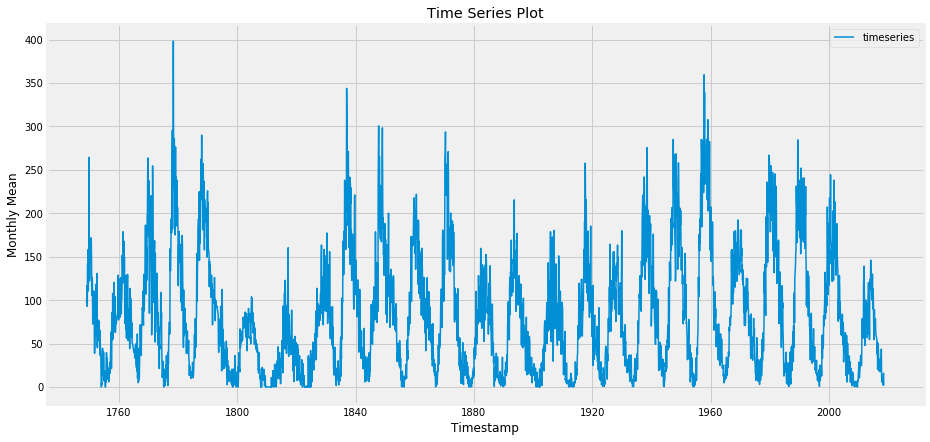

In [5]:
plt.figure(figsize=(14, 7))

plt.plot(
    play_df.index, play_df['monthly_mean'], 
    lw=1.5, label='timeseries')
plt.title('Time Series Plot')
plt.xlabel('Timestamp')
plt.ylabel('Monthly Mean')
plt.legend()
plt.show()

The timeseries plot shows two components, __`trend`__ and __`seasonality`__. We need to remove both the components to make it __`stationary`__.

#### Trend {-}
It is an ___upward___ or a ___downward___ movement with respect to time.

#### Seasonality {-}
It is a ___cyclical pattern___ that repeats on particular time periods.

### Training and Validation datasets {-}
In this step, we split our dataset of $3235$ instances into $3185$ ___training set___ and $50$ ___validation set___. We also make chart of the same.

In [6]:
test_size = 50

training_play_df = play_df.iloc[: -test_size]
validation_play_df = play_df.iloc[-test_size :]
print("Length of original dataset : {}".format(len(play_df)))
print("Length of training set : {}".format(len(training_play_df)))
print("Length of validation set : {}".format(len(validation_play_df)))

Length of original dataset : 3235
Length of training set : 3185
Length of validation set : 50


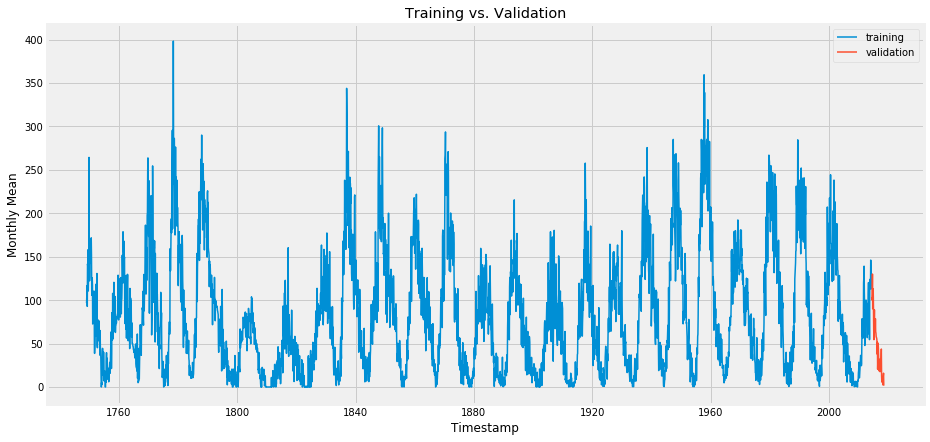

In [7]:
plt.figure(figsize=(14, 7))

plt.plot(
    training_play_df.index, training_play_df['monthly_mean'],
    lw=1.5, label='training')
plt.plot(
    validation_play_df.index, validation_play_df['monthly_mean'],
    lw=1.5, label='validation')
plt.title('Training vs. Validation')
plt.xlabel('Timestamp')
plt.ylabel('Monthly Mean')
plt.legend()
plt.show()

### Moving Averages {-}
Moving averages is a smoothing technique. This interpolates points with respect to __`window`__ size and evaluates mean. When graphing it, it makes a smooth curve with respect to original data points. Here we consider a window size of $28$, as it gives better emphasis on monthly wise data.

In [8]:
training_mv = training_play_df.copy()

training_mv["mv_av_28"] = training_play_df['monthly_mean'].rolling(
    window=28).mean()
display(training_mv.tail())

y_hat_mov_avg = validation_play_df.copy()

y_hat_mov_avg['mv_av_28'] = training_play_df['monthly_mean'].rolling(
    window=28).mean().iloc[-1]
display(y_hat_mov_avg.head())

,monthly_mean,mv_av_28
timestamp,,
2014-01-31,117.00,93.87
2014-02-28,146.10,94.60
2014-03-31,128.70,94.23
2014-04-30,112.50,94.34
2014-05-31,112.50,94.99


,monthly_mean,mv_av_28
timestamp,,
2014-06-30,102.90,94.99
2014-07-31,100.20,94.99
2014-08-31,106.90,94.99
2014-09-30,130.00,94.99
2014-10-31,90.00,94.99


#### MA - 28 {-}

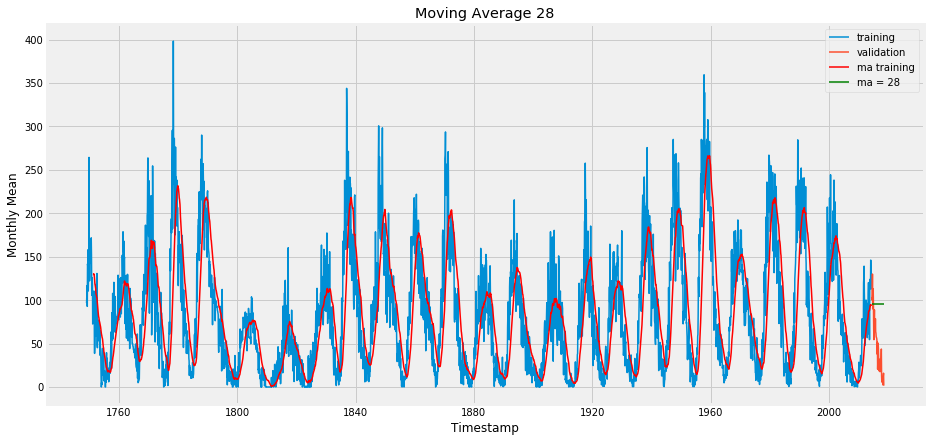

Root Mean Squared Error : 57.95318


In [9]:
plt.figure(figsize=(14, 7))

plt.plot(
    training_play_df.index, training_play_df['monthly_mean'],
    lw=1.5, label='training')
plt.plot(
    validation_play_df.index, validation_play_df['monthly_mean'],
    lw=1.5, label='validation')
plt.plot(
    training_mv.index, training_mv['mv_av_28'],
    lw=1.5, color='r', label='ma training')
plt.plot(
    y_hat_mov_avg.index, y_hat_mov_avg['mv_av_28'],
    lw=1.5, color='g', label='ma = 28')
plt.title('Moving Average 28')
plt.xlabel('Timestamp')
plt.ylabel('Monthly Mean')
plt.legend()
plt.show()

rmse_mv_av = math.sqrt(
    metrics.mean_squared_error(
        y_hat_mov_avg['mv_av_28'],
        validation_play_df['monthly_mean']))
print('Root Mean Squared Error : {:.5f}'.format(rmse_mv_av))

### Differencing @ 1 {-}
If the timeseries data exhibits a polynomial type of trend the method of differencing will provide the stationary data. The first differencing of $Z_t$ is given by,

\begin{equation*}
\begin{split}
\triangle Z_t
&=Z_t-Z_{t-1}\\
&=Z_t-BZ_t\\
&=\bigg(1-B\bigg)Z_t
\end{split}
\end{equation*}
where $B$ is backshift operator. Below is single differencing for the data. Programmatically, we repeat this
```python
>>> difference(t) = observation(t) - observation(t-1)
```
for the entire column.

,monthly_mean
timestamp,
1749-01-31,96.70
1749-02-28,104.30
1749-03-31,116.70
1749-04-30,92.80
1749-05-31,141.70


,monthly_mean,diff_1
timestamp,,
1749-01-31,96.70,nan
1749-02-28,104.30,7.60
1749-03-31,116.70,12.40
1749-04-30,92.80,-23.90
1749-05-31,141.70,48.90


,monthly_mean
timestamp,
2014-06-30,102.90
2014-07-31,100.20
2014-08-31,106.90
2014-09-30,130.00
2014-10-31,90.00


,monthly_mean,diff_1
timestamp,,
2014-06-30,102.90,nan
2014-07-31,100.20,-2.70
2014-08-31,106.90,6.70
2014-09-30,130.00,23.10
2014-10-31,90.00,-40.00


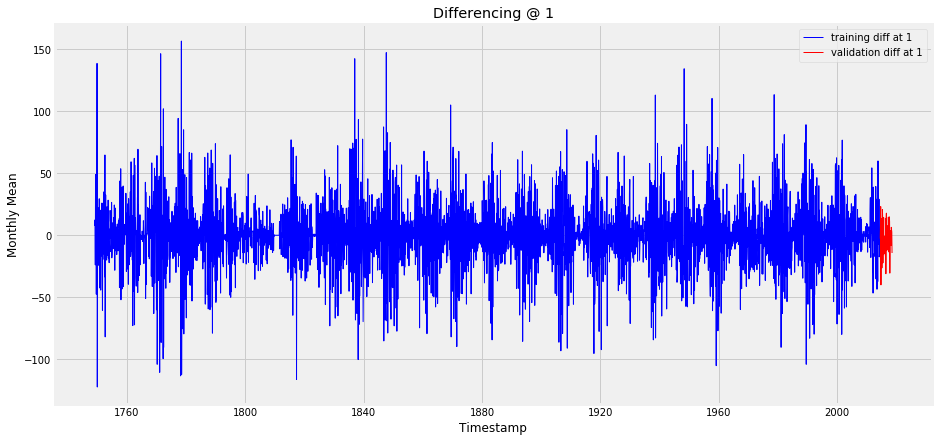

In [10]:
training_diff = training_play_df.copy()
display(training_diff.head())

training_diff['diff_1'] = training_diff['monthly_mean'].diff(periods=1)
display(training_diff.head())

validation_diff = validation_play_df.copy()
display(validation_diff.head())

validation_diff['diff_1'] = validation_diff['monthly_mean'].diff(periods=1)
display(validation_diff.head())

plt.figure(figsize=(14, 7))

plt.plot(
    training_diff.index, training_diff['diff_1'],
    lw=1, color='blue', label='training diff at 1')
plt.plot(
    validation_diff.index, validation_diff['diff_1'],
    lw=1, color='r', label='validation diff at 1')
plt.title("Differencing @ 1")
plt.xlabel('Timestamp')
plt.ylabel('Monthly Mean')
plt.legend()
plt.show()

### ADF Test {-}
With `ADF` test, we obtain `p-value = 0`. The second value of `result` represents `p-value`.

The results are:
-10.441412018389277
1.5185892055401657e-18
28
3156
{'1%': -3.4324237093576846, '5%': -2.862456237513167, '10%': -2.5672577344900813}
29158.82160881943


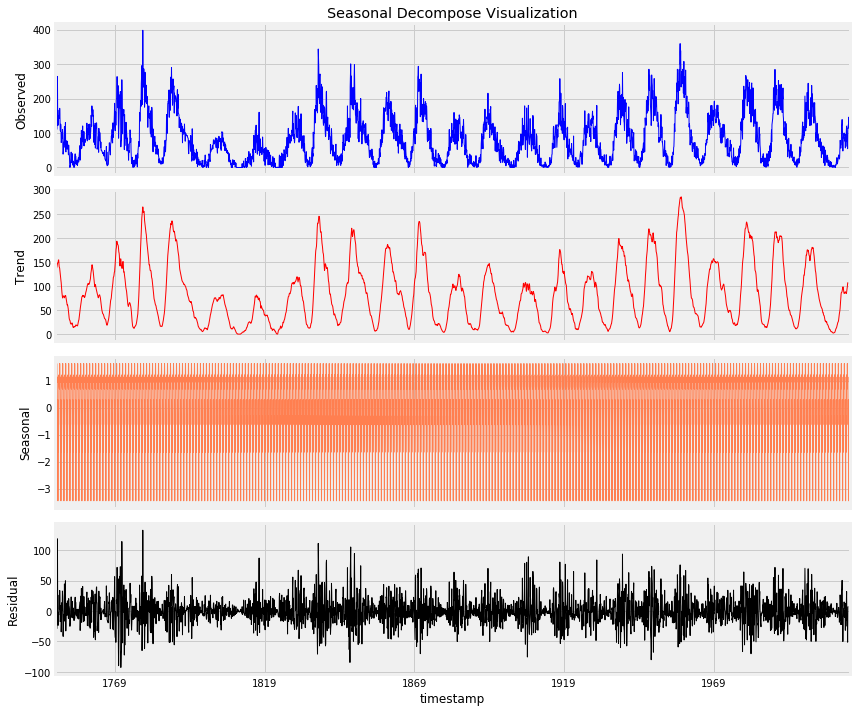

In [11]:
result = adfuller(training_play_df['monthly_mean'])
result = [i for i in result]
print('The results are:', *result, sep='\n')

dta = seasonal_decompose(training_play_df)
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12, 10), sharex=True)

dta.observed.plot(ax=axs[0], legend=False, lw=1, color='b')
axs[0].set_title('Seasonal Decompose Visualization')
axs[0].set_ylabel('Observed')

dta.trend.plot(ax=axs[1], legend=False, lw=1, color='r')
axs[1].set_ylabel('Trend')

dta.seasonal.plot(ax=axs[2], legend=False, lw=1, color='coral')
axs[2].set_ylabel('Seasonal')

dta.resid.plot(ax=axs[3], legend=False, lw=1, color='k')
axs[3].set_ylabel('Residual')

plt.tight_layout()
plt.show()

#### Interpretation
* $H_0$ : Data is stationary.
* $H_1$ : Data is not stationary.
* `p-value` is $< 0.05$, hence we reject $H_0$ and accept $H_1$.

### Holt Winter's Model {-}
The reason we implemnt ___Holt-Winter Model___ is because our data reveals both trend and seasonal components.
\begin{equation*}\label{eq:2}
Z_t=m_t+s_t+e_t
\end{equation*}
where, $m_t$ is trend component, $s_t$ is seasonal component and $e_t$ is error component or residual component.

For this kind of data, Holt-Winter model would fetch better results as this deletes both seasonal patten and trend component from the data making it stationary. Just to show the components we implement __`seasonal_decompose`__ method and plot the above graph in the former step. In the later steps, we actually remove trend and seasonal components.

In [12]:
y_hat_holtwin = validation_play_df.copy()
display(y_hat_holtwin.head())

fit_holtwin = ExponentialSmoothing(
    np.asarray(training_play_df['monthly_mean']),
    seasonal_periods=28,
    trend='add',
    seasonal='add').fit()

y_hat_holtwin['holt_winter'] = fit_holtwin.forecast(
    len(validation_play_df))
display(y_hat_holtwin.head())

,monthly_mean
timestamp,
2014-06-30,102.90
2014-07-31,100.20
2014-08-31,106.90
2014-09-30,130.00
2014-10-31,90.00


,monthly_mean,holt_winter
timestamp,,
2014-06-30,102.90,121.45
2014-07-31,100.20,118.92
2014-08-31,106.90,120.31
2014-09-30,130.00,118.64
2014-10-31,90.00,122.27


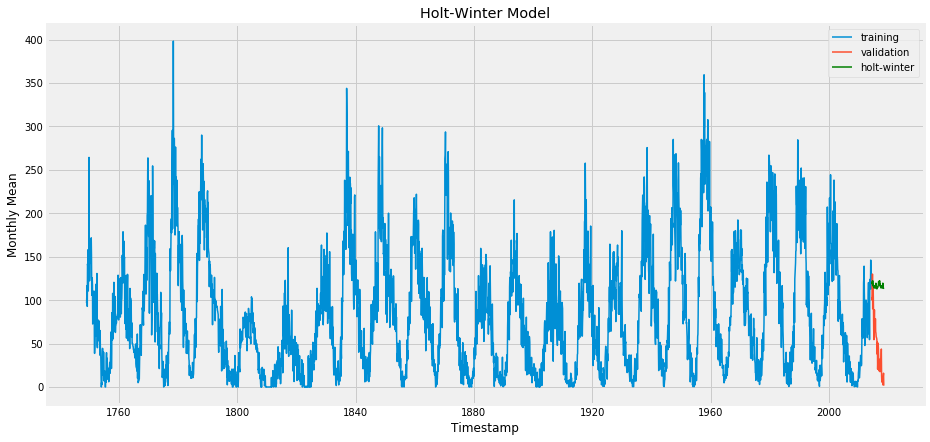

Root Mean Squared Error : 76.28403


In [13]:
plt.figure(figsize=(14, 7))

plt.plot(
    training_play_df.index, training_play_df['monthly_mean'],
    lw=1.5, label='training')
plt.plot(
    validation_play_df.index, validation_play_df['monthly_mean'],
    lw=1.5, label='validation')
plt.plot(
    y_hat_holtwin.index, y_hat_holtwin['holt_winter'],
    lw=1.5, color='g', label='holt-winter')
plt.title('Holt-Winter Model')
plt.xlabel('Timestamp')
plt.ylabel('Monthly Mean')
plt.legend()
plt.show()

rmse_holtwin = math.sqrt(
    metrics.mean_squared_error(
        y_hat_holtwin['holt_winter'],
        validation_play_df['monthly_mean']))
print('Root Mean Squared Error : {:.5f}'.format(rmse_holtwin))

In [14]:
def test_stationarity(time_Series):
    """A function to test stationarity 
    of time-series variable."""

    rolmean = time_Series.rolling(window=28).mean()
    rolstd = time_Series.rolling(window=28).std()

    orig = plt.plot(time_Series, c='b', lw=1, label='Original')
    mean = plt.plot(rolmean, c='r', lw=1.5, label='Rolling Mean')
    std = plt.plot(rolstd, c='k', lw=1.5, label='Rolling Stdev')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show(block=False)

    # perform Dickey-Fuller test
    print('-' * 29)
    print('Result of Dickey-Fuller Test:')
    print('-' * 29)
    dftest = adfuller(time_Series, autolag='AIC')
    dfoutput = pd.Series(
        dftest[0:4],
        index=['Test Statistic', 'p-value', '#Lags Used',
               'Number of Observations Used'])

    for key, value in dftest[4].items():
        dfoutput[
            'Critical Value ({})'.format(key)] = "{:.5f}".format(value)
    print(dfoutput)

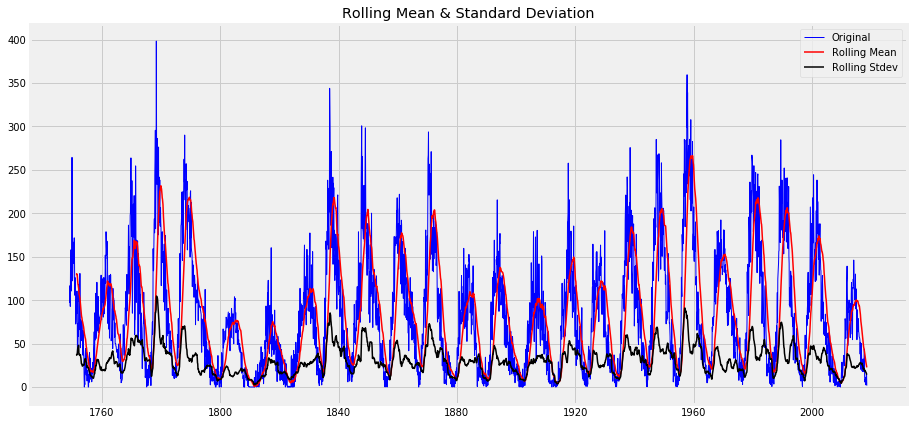

-----------------------------
Result of Dickey-Fuller Test:
-----------------------------
Test Statistic                   -10.49
p-value                            0.00
#Lags Used                        28.00
Number of Observations Used     3206.00
Critical Value (1%)            -3.43239
Critical Value (5%)            -2.86244
Critical Value (10%)           -2.56725
dtype: object


In [15]:
rcParams['figure.figsize'] = 14, 7
test_stationarity(play_df['monthly_mean'])

### Removal of Trend and Seasonality {-}
In this step, we aim to remove trend and seasonal components. For this, we first do $\log$ scaling of the data and evaluate rolling mean with window size $28$ on log-scaled data and difference it with previously calculated log-scaled data and moving average. This whole set of steps delete trend and seasonal components and brings data at stationarity.

The first plot shows graph of log-scaled data. And the plots for the rest are also shown.

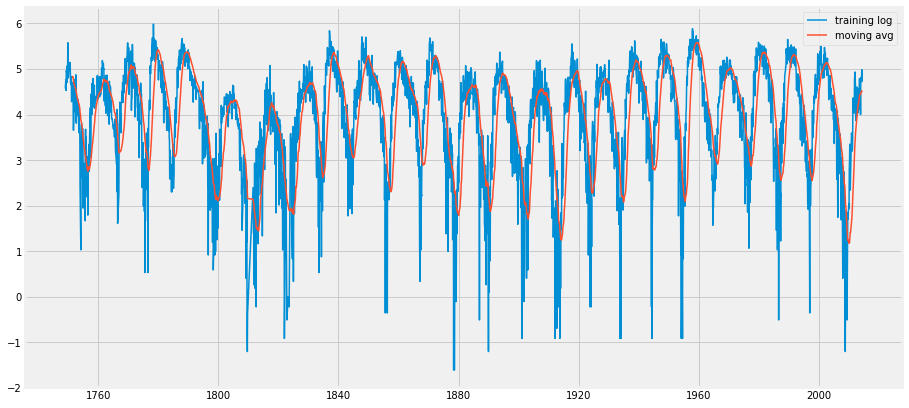

Removal of Trend and Seasonality: 
---------------------------------


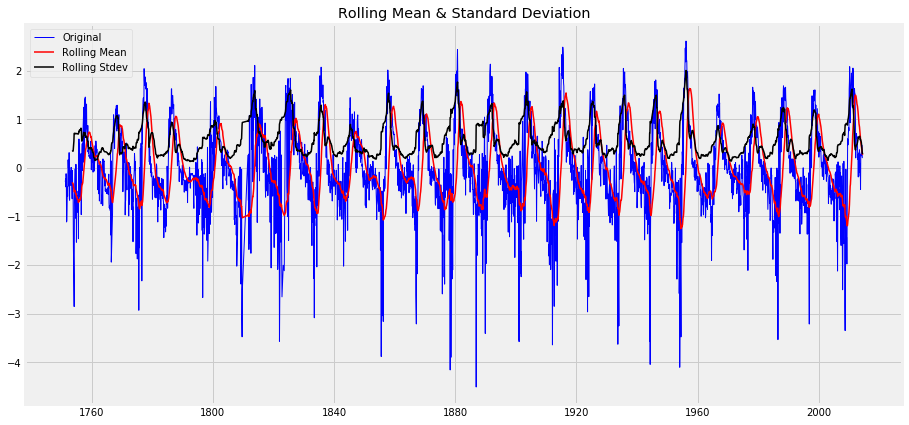

-----------------------------
Result of Dickey-Fuller Test:
-----------------------------
Test Statistic                   -11.09
p-value                            0.00
#Lags Used                        20.00
Number of Observations Used     3070.00
Critical Value (1%)            -3.43248
Critical Value (5%)            -2.86248
Critical Value (10%)           -2.56727
dtype: object

Stablizing by Differencing: 
---------------------------


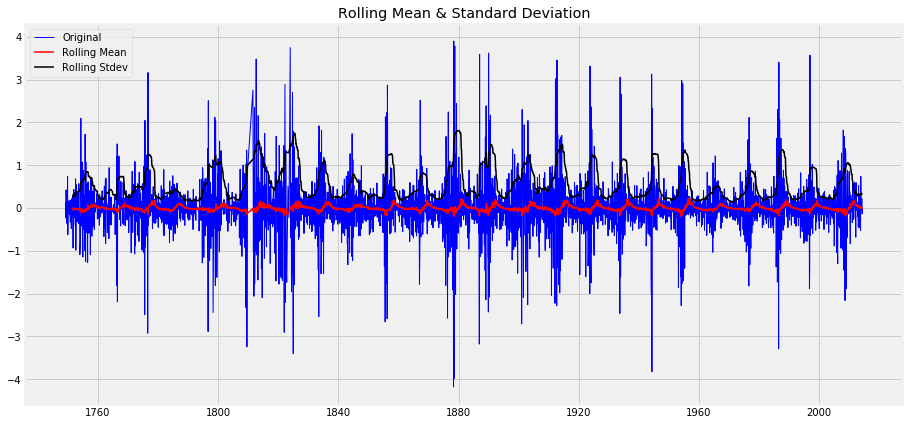

-----------------------------
Result of Dickey-Fuller Test:
-----------------------------
Test Statistic                   -11.33
p-value                            0.00
#Lags Used                        16.00
Number of Observations Used     3100.00
Critical Value (1%)            -3.43246
Critical Value (5%)            -2.86247
Critical Value (10%)           -2.56727
dtype: object


In [16]:
train_log_set = np.log(
    training_play_df['monthly_mean'])

df = pd.DataFrame()
df['temp'] = train_log_set
df = df.replace([np.inf, -np.inf], np.nan).dropna()

train_log_set = df['temp']

validation_log_set = np.log(
    validation_play_df['monthly_mean'])

mov_avg = train_log_set.rolling(window=28).mean()

plt.figure(figsize=(14, 7))
plt.plot(train_log_set, lw=1.5, label='training log')
plt.plot(mov_avg, lw=1.5, label='moving avg')
plt.legend()
plt.show()

# removes trend and stationarity
train_log_mov_avg_diff = train_log_set - mov_avg

train_log_mov_avg_diff.dropna(inplace=True)

print("Removal of Trend and Seasonality: ")
print('-' * len('Removal of Trend and Seasonality:'))
test_stationarity(train_log_mov_avg_diff)

# Stablizing with differencing
train_log_diff = train_log_set - train_log_set.shift(1)
print("\nStablizing by Differencing: ")
print('-' * len('Stablizing by Differencing:'))

df = pd.DataFrame()
df['temp'] = train_log_diff
df = df.replace([np.inf, -np.inf], np.nan).dropna()

train_log_diff = df['temp']
test_stationarity(train_log_diff)

The final graph is what we care most. It is a plot of stationary points. In the later steps we again perform __`seasonal_decompose`__ and check for stationarity check of __`residuals`__. Seasonal decomposition renders four charts,

#### Seasonal decomposition

* This is a method provided by `statsmodels`.
* The method performs seasonal decomposition using moving average provided the `window` size or `freq` argument.
* Takes an `array-like` values from the dataset.
* Returns three components namely, __`trend`__, __`seasoanl`__ and __`resid`__.

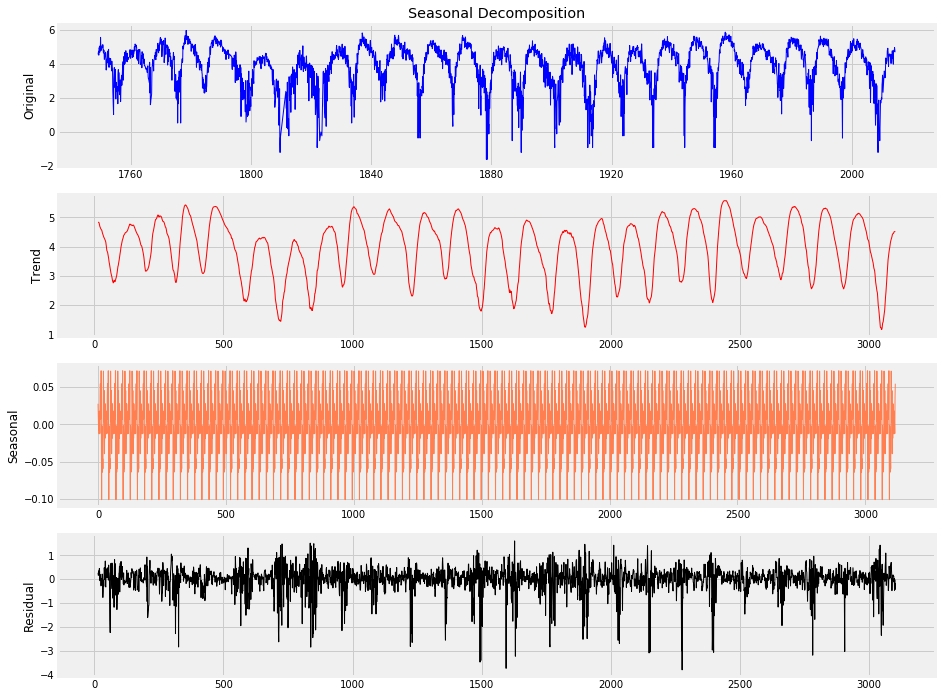

In [17]:
decomposition = seasonal_decompose(
    pd.DataFrame(train_log_set).values, freq=28)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(14, 12))

plt.subplot(411)
plt.plot(train_log_set, lw=1, color='b')
plt.ylabel('Original')
plt.title('Seasonal Decomposition')

plt.subplot(412)
plt.plot(trend, lw=1, color='r')
plt.ylabel('Trend')

plt.subplot(413)
plt.plot(seasonal, lw=1, color='coral')
plt.ylabel('Seasonal')

plt.subplot(414)
plt.plot(residual, lw=1, color='k')
plt.ylabel('Residual')
plt.show()

After exercising `seasonal_decompose` we extract `residuals` of the data.

### Stationarity of Residual Analysis {-}

,residuals
Timestamp,
1750-03-31,0.27
1750-04-30,0.16
1750-05-31,0.19
1750-06-30,0.35
1750-07-31,0.20


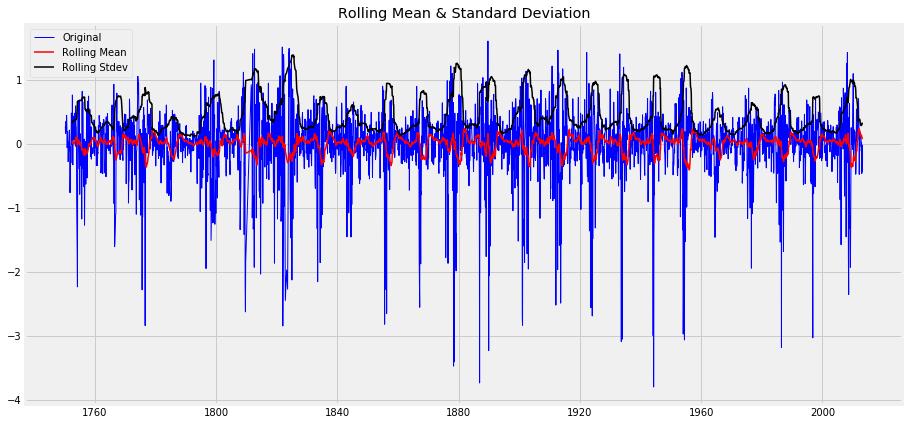

-----------------------------
Result of Dickey-Fuller Test:
-----------------------------
Test Statistic                   -14.69
p-value                            0.00
#Lags Used                        20.00
Number of Observations Used     3069.00
Critical Value (1%)            -3.43248
Critical Value (5%)            -2.86248
Critical Value (10%)           -2.56727
dtype: object


In [18]:
residual_df = pd.DataFrame(residual, columns=['residuals'])
residual_df['Timestamp'] = train_log_set.index
residual_df.set_index('Timestamp', inplace=True)
residual_df = residual_df.dropna()
display(residual_df.head())

test_stationarity(residual_df['residuals'])

Residuals pass stationarity test as the graph is stationary. But still the `p-value` is $0$. As `p-value` is not converging us to any conclusion, to gain better insights, we plot the ___kernel-density-estimation___ of residuals to conclude the distribution of residuals. We will perform that in later steps.

### ACF and PACF {-}
We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an ___autocorrelation___.<br><br>
A ___partial autocorrelation___ is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.<br><br>
__AutoCorrelation Function__ and __Partial AutoCorrelation Function__ plots help us in determining the __`order`__ of the process. We determine the order as,

#### For `AR(p)` process:
From `PACF` plot, we observe significant lags (lags whose value crosses upper-confidence) and determine the order.

#### For `MA(q)` process:
Conversely, from `ACF` plot, we observe significant lags (lags whose value crosses upper-confidence) and determine the order.

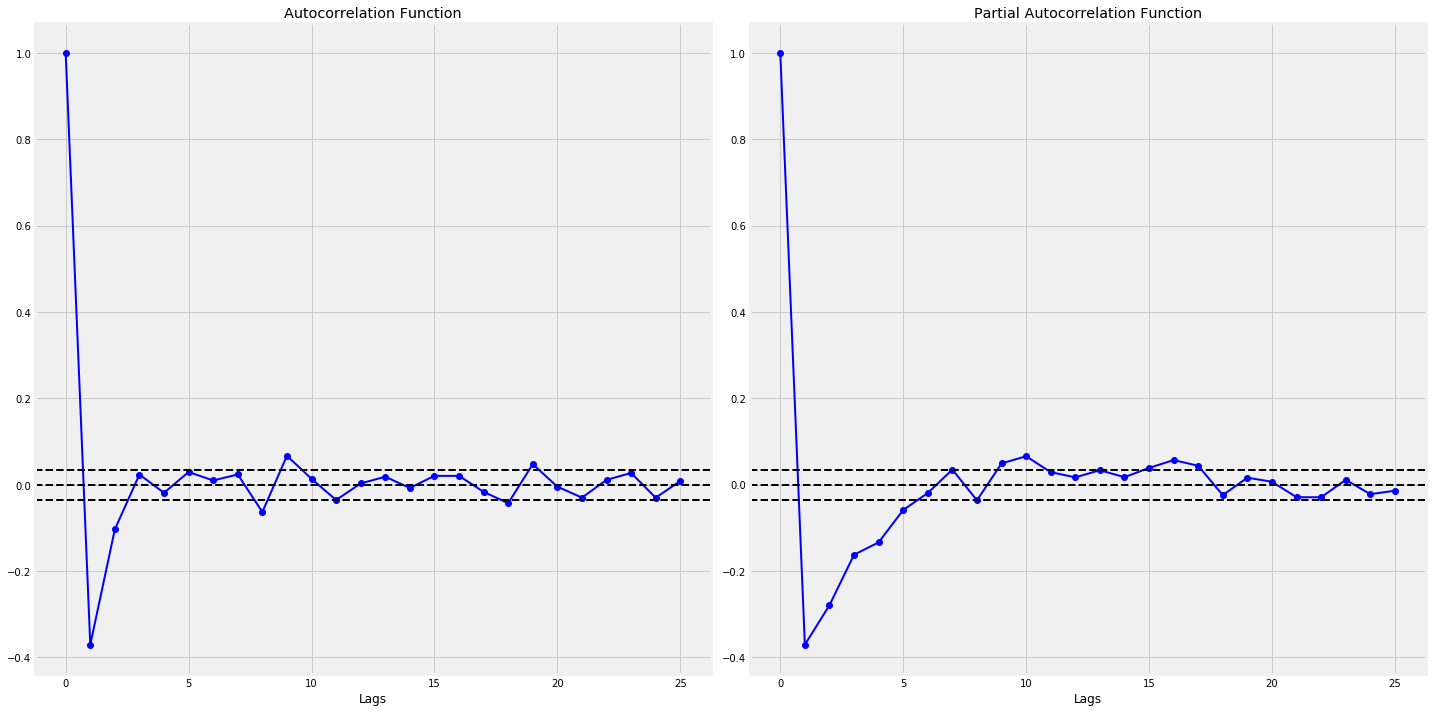

In [19]:
lag_acf = acf(train_log_diff, nlags=25)
lag_pacf = pacf(train_log_diff, nlags=25)

plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.plot(lag_acf, marker='o', lw=2, color='b')
plt.axhline(y=0, linestyle='--', c='k', lw=2)
plt.axhline(
    y=-1.96/np.sqrt(len(train_log_diff)), ls='--', c='k', lw=2)
plt.axhline(
    y=1.96/np.sqrt(len(train_log_diff)), ls='--', c='k', lw=2)
plt.title('Autocorrelation Function')
plt.xlabel('Lags')

plt.subplot(122)
plt.plot(lag_pacf, marker='o', lw=2, color='b')
plt.axhline(y=0, linestyle='--', c='k', lw=2)
plt.axhline(
    y=-1.96/np.sqrt(len(train_log_diff)), ls='--', c='k', lw=2)
plt.axhline(
    y=1.96/np.sqrt(len(train_log_diff)), ls='--', c='k', lw=2)
plt.title('Partial Autocorrelation Function')
plt.xlabel('Lags')

plt.tight_layout()
plt.show()

### Finding ARIMA Model Order {-}
The crucial step here is to find the `order` of `ARIMA` process. For that we use, __`auto_arima()`__ function, an equivalent of __`auto.arima()`__ in `R`. We pass in `play_df` dataset and pass in an argument `seasonal=True` as the `play_df` has seasonality. Below the order of `ARIMA` model.

- `p` : order of `AR` process.
- `d` : differencing number.
- `q` : order of `MA` process.

In [20]:
arima_order = auto_arima(play_df, seasonal=True)
print("ARIMA order : {}".format(arima_order.order))

ARIMA order : (1, 0, 2)


Now we fit `ARIMA(p, d, q)` model with `order = (1, 0, 2)` from the previous result and display the summary of the model. Later this will converted to `ARMA(1, 2)` process.

In [21]:
model = ARIMA(play_df, order=(1, 0, 2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:           monthly_mean   No. Observations:                 3235
Model:                     ARMA(1, 2)   Log Likelihood              -15028.110
Method:                       css-mle   S.D. of innovations             25.184
Date:                Fri, 19 Apr 2019   AIC                          30066.219
Time:                        08:52:43   BIC                          30096.628
Sample:                    01-31-1749   HQIC                         30077.116
                         - 07-31-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 81.6418     11.927      6.845      0.000      58.264     105.019
ar.L1.monthly_mean     0.9825      0.003    282.213      0.000       0.976       0.989
ma.L1.monthly_mean  

### Fitting ARIMA Model for Validation data {-}
In this step, we predict data for `validation_set`. The graph shows that model fits decently. And `error` is reduced to $13.28$.

2014-06-30   115.28
2014-07-31   108.09
2014-08-31   104.49
2014-09-30   106.38
2014-10-31   119.28
              ...  
2018-03-31    13.53
2018-04-30     8.56
2018-05-31    11.29
2018-06-30    13.59
2018-07-31    15.89
Freq: M, Length: 50, dtype: float64


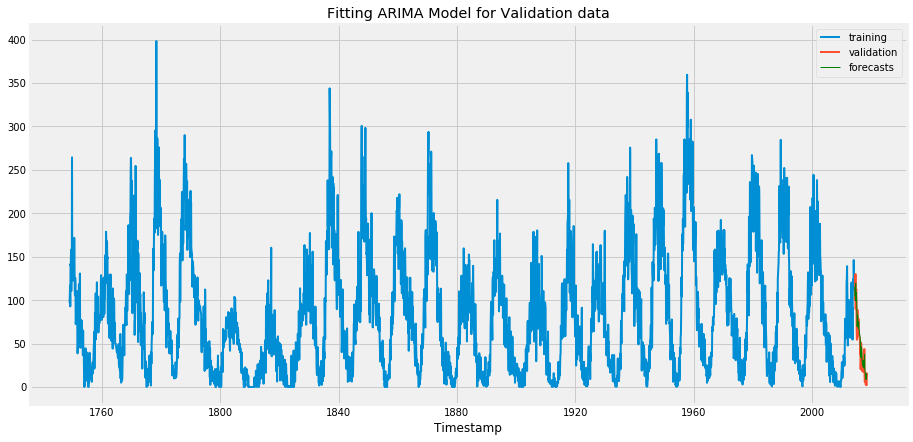

Root Mean Squared Error : 13.28141


In [22]:
start_threshold = dt.datetime(2014, 6, 30)
end_threshold = dt.datetime(2018, 7, 31)

forecast_validation = model_fit.predict(
    start=start_threshold, end=end_threshold)
print(forecast_validation)

plt.plot(
    training_play_df.index, training_play_df['monthly_mean'],
    lw=2, label='training')
plt.plot(
    validation_play_df.index, validation_play_df['monthly_mean'],
    lw=2, label='validation')
plt.plot(forecast_validation, lw=1, label='forecasts', color='g')
plt.title('Fitting ARIMA Model for Validation data')
plt.xlabel('Timestamp')
plt.legend()
plt.show()

rmse_arima = math.sqrt(
    metrics.mean_squared_error(
        forecast_validation,
        validation_play_df['monthly_mean']))
print('Root Mean Squared Error : {:.5f}'.format(rmse_arima))

### Distribution of Residuals {-}
As mentioned earlier, `p-value` in stationarity check of `residuals` was not giving a better insight. So here is the plot of `kernel-density-estimation` of residuals. This approach follows `guassian-kernels` to estimate the ___probability density function___ (`PDF`) of variable (here `residuals`). In the below graph it clearly represents a `bell-curve` with `mean = 0`. Hence from this, we can conclude that `residuals` are normally distributed.

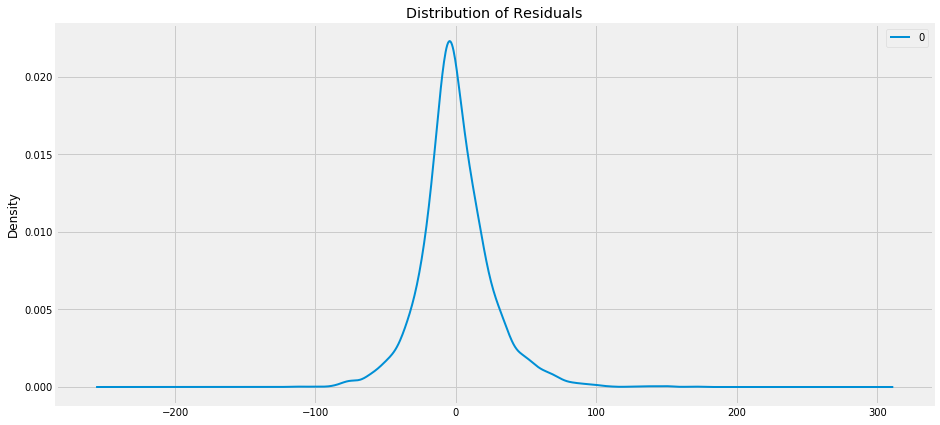

In [23]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(kind='kde', lw=2)
plt.title('Distribution of Residuals')
plt.legend()
plt.show()

### Conclusion {-}
From this project, we learn the practical implementation of timeseries techniques. We also learn to set up (formation of, cleaning of) the data to carry on with the analysis. This EDA approach help us to deal with data as in real world no data is well-nourished and well-formed for analysis. Most of the time will be spent on cleaning and adjusting the data instances.<br><br>
We perform several model fitting techniques like, `Moving Averages`, `Holt-Winter Smoothing` and `ARIMA` and obtain the results. We also performed stationarity check of both `data` and `residuals`. This enables us to ensure the stationarity of the timeseries data. Implementing these techinques in `Python` gave us more scope and understandability.